In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import skimage

In [59]:
def show_img(array: np.ndarray):
    plt.axis('off')
    plt.imshow(array)
    plt.show()

/var/folders/wm/4tmm8v6n6j7d8s6tdbkm95b80000gn/T/ipykernel_54756/1053819002.py:6: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (391, 293, 3) looks like that of an RGB image.
  threshold = threshold_otsu(tumor) + 105


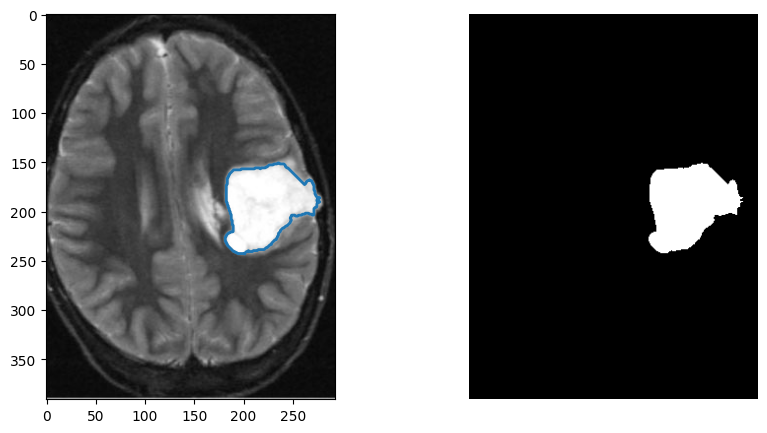

In [93]:
from skimage.filters import threshold_otsu

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tumor = cv2.imread('brain_tumor.png')
threshold = threshold_otsu(tumor) + 105
seed = np.copy(tumor)
seed[1:-1, 1:-1] = tumor.max()

rec = skimage.morphology.reconstruction(seed, tumor, method='erosion')

binary = rec[:, :, 0] > threshold
binary = skimage.morphology.remove_small_objects(binary, min_size=400, connectivity=2)

# find contours from mask and draw it on the original image
contours = skimage.measure.find_contours(binary, 0.5)
for contour in contours:
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.axis('off')
ax1.imshow(tumor)
ax2.imshow(binary, cmap='gray')